# Precio del Oro y la plata

###### Lucho Ago 2023

#Pasos para crear un modelo VAR con series temporales multivariantes:

1. Análisis exploratorios de los datos.
2. Dividir la serie en conjuntos de entrenamiento y prueba.
3. Prueba de estacionariedad.
4. Transformar la serie de entrenamiento si es necesario. 
5. Construir un modelo VAR sobre las series transformadas.
6. Causalidad de Granger.
7. Diagnóstico del modelo.
8. Realizar pronósticos utilizando el modelo finalmente elegido.
9. Transformación inversa del pronóstico a la escala original.
10. Realizar una evaluación del pronóstico.

# Los datos: Yahoo Finance
Si quieres tener los datos de precios, entidades, activos, etc, actualizados a día de hoy, lo puedes hacer de la siguiente manera. Estos datos han sido obtenidos mediante [Yahoo Finance](https://es.finance.yahoo.com/), una plataforma donde puedes ver, obtener, estudiar, analizar y comparar los precios de cierre de diferentes de acciones de los mercados financieros. La forma de obtener los datos de Yahoo Finance en Python es mediante el paquete `yfinance` que tendremos que instalar e importar.

### Import Library

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.graphics.tsaplots as sgt


# Import datasets

In [3]:
raw_data = yf.download (tickers = "GC=F, SI=F, EUR=X, CL=F, ^GSPC, ^TNX", start = "2005-01-07", 
                              end = "2020-06-03", interval = "1d", group_by = 'ticker', auto_adjust = True, threads=True)
raw_data

[*********************100%%**********************]  6 of 6 completed


^GSPC                                                       \
                   Open         High          Low        Close        Volume   
Date                                                                           
2005-01-07  1187.890015  1192.199951  1182.160034  1186.189941  1.477900e+09   
2005-01-10  1186.189941  1194.780029  1184.800049  1190.250000  1.490400e+09   
2005-01-11  1190.250000  1190.250000  1180.430054  1182.989990  1.488800e+09   
2005-01-12  1182.989990  1187.920044  1175.640015  1187.699951  1.562100e+09   
2005-01-13  1187.699951  1187.699951  1175.810059  1177.449951  1.510300e+09   
...                 ...          ...          ...          ...           ...   
2020-05-27  3015.649902  3036.250000  2969.750000  3036.129883  6.398000e+09   
2020-05-28  3046.610107  3068.669922  3023.399902  3029.729980  5.447020e+09   
2020-05-29  3025.169922  3049.169922  2998.610107  3044.310059  7.297550e+09   
2020-06-01  3038.780029  3062.179932  3031.540039  3055.729980  4.684170e+09   
2020-06-02  3064.780029  3081.070068  3051.639893  3080.820068  5.197150e+09   

                   GC=F                                                   ...  \
                   Open         High          Low        Close    Volume  ...   
Date                                                                      ...   
2005-01-07   423.700012   423.700012   418.700012   418.899994       1.0  ...   
2005-01-10   419.100006   419.100006   419.100006   419.100006       1.0  ...   
2005-01-11   421.899994   421.899994   421.899994   421.899994       1.0  ...   
2005-01-12   423.799988   423.799988   423.799988   426.100006       1.0  ...   
2005-01-13   424.700012   424.700012   424.700012   424.500000       1.0  ...   
...                 ...          ...          ...          ...       ...  ...   
2020-05-27  1685.599976  1710.300049  1685.599976  1710.300049  137416.0  ...   
2020-05-28  1709.300049  1727.800049  1705.000000  1713.300049   23355.0  ...   
2020-05-29  1718.800049  1738.300049  1715.099976  1736.900024    1526.0  ...   
2020-06-01  1740.400024  1747.000000  1727.099976  1737.800049     871.0  ...   
2020-06-02  1743.000000  1745.500000  1721.800049  1725.199951     741.0  ...   

                 CL=F                                               EUR=X  \
                 Open       High        Low      Close    Volume     Open   
Date                                                                        
2005-01-07  45.500000  46.099998  44.750000  45.430000   99725.0  0.75861   
2005-01-10  45.599998  47.299999  45.200001  45.330002  103573.0  0.76476   
2005-01-11  45.169998  46.150002  44.950001  45.680000   90540.0  0.76254   
2005-01-12  45.730000  46.599998  45.000000  46.369999  117369.0  0.76254   
2005-01-13  46.500000  48.400002  46.299999  48.040001  108475.0  0.75420   
...               ...        ...        ...        ...       ...      ...   
2020-05-27  34.139999  34.320000  31.750000  32.810001  415246.0  0.91070   
2020-05-28  32.099998  34.209999  31.139999  33.709999  440168.0  0.90783   
2020-05-29  33.680000  35.770000  32.360001  35.490002  443647.0  0.90268   
2020-06-01  35.209999  35.900002  34.270000  35.439999  385710.0  0.89972   
2020-06-02  35.560001  37.060001  35.279999  36.810001  343483.0  0.89883   

                                              
               High      Low    Close Volume  
Date                                          
2005-01-07  0.76746  0.75483  0.76564    0.0  
2005-01-10  0.76546  0.76220  0.76278    0.0  
2005-01-11  0.76307  0.75924  0.76237    0.0  
2005-01-12  0.76412  0.75239  0.75438    0.0  
2005-01-13  0.75740  0.75381  0.75694    0.0  
...             ...      ...      ...    ...  
2020-05-27  0.91436  0.90663  0.91060    0.0  
2020-05-28  0.90966  0.90319  0.90770    0.0  
2020-05-29  0.90331  0.89729  0.90260    0.0  
2020-06-01  0.90078  0.89670  0.89940    0.0  
2020-06-02  0.89963  0.89320  0.89880    0.0  

[4018 rows x 30 columns]

In [4]:
df_comp=raw_data.copy()
df_comp['Gold'] = df_comp['GC=F'].Close[:]
df_comp['Silver'] = df_comp['SI=F'].Close[:]
df_comp['Oil'] = df_comp['CL=F'].Close[:]
df_comp['Treasury'] = df_comp['^TNX'].Close[:]
df_comp['SP500'] = df_comp['^GSPC'].Close[:]
df_comp['USD/EUR'] = df_comp['EUR=X'].Close[:]


In [5]:
df_comp.head()

^GSPC                                                       \
                   Open         High          Low        Close        Volume   
Date                                                                           
2005-01-07  1187.890015  1192.199951  1182.160034  1186.189941  1.477900e+09   
2005-01-10  1186.189941  1194.780029  1184.800049  1190.250000  1.490400e+09   
2005-01-11  1190.250000  1190.250000  1180.430054  1182.989990  1.488800e+09   
2005-01-12  1182.989990  1187.920044  1175.640015  1187.699951  1.562100e+09   
2005-01-13  1187.699951  1187.699951  1175.810059  1177.449951  1.510300e+09   

                  GC=F                                             ...  \
                  Open        High         Low       Close Volume  ...   
Date                                                               ...   
2005-01-07  423.700012  423.700012  418.700012  418.899994    1.0  ...   
2005-01-10  419.100006  419.100006  419.100006  419.100006    1.0  ...   
2005-01-11  421.899994  421.899994  421.899994  421.899994    1.0  ...   
2005-01-12  423.799988  423.799988  423.799988  426.100006    1.0  ...   
2005-01-13  424.700012  424.700012  424.700012  424.500000    1.0  ...   

              EUR=X                                 Gold Silver        Oil  \
               High      Low    Close Volume                                 
Date                                                                         
2005-01-07  0.76746  0.75483  0.76564    0.0  418.899994  6.429  45.430000   
2005-01-10  0.76546  0.76220  0.76278    0.0  419.100006  6.431  45.330002   
2005-01-11  0.76307  0.75924  0.76237    0.0  421.899994  6.623  45.680000   
2005-01-12  0.76412  0.75239  0.75438    0.0  426.100006  6.728  46.369999   
2005-01-13  0.75740  0.75381  0.75694    0.0  424.500000  6.730  48.040001   

           Treasury        SP500  USD/EUR  
                                           
Date                                       
2005-01-07    4.285  1186.189941  0.76564  
2005-01-10    4.278  1190.250000  0.76278  
2005-01-11    4.244  1182.989990  0.76237  
2005-01-12    4.236  1187.699951  0.75438  
2005-01-13    4.187  1177.449951  0.75694  

[5 rows x 36 columns]

In [6]:
del df_comp['GC=F']
del df_comp['SI=F']
del df_comp['CL=F']
del df_comp['^TNX']
del df_comp['^GSPC']
del df_comp['EUR=X']

In [7]:
df_comp.isna().sum()

Gold          149
Silver        148
Oil           145
Treasury      148
SP500         142
USD/EUR        28
dtype: int64

In [8]:
df_comp.isnull().sum()

Gold          149
Silver        148
Oil           145
Treasury      148
SP500         142
USD/EUR        28
dtype: int64

In [9]:
#Seteo la frecuencia y relleno los datos faltantes
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
df_comp.isnull().sum()

Gold          0
Silver        0
Oil           0
Treasury      0
SP500         0
USD/EUR       0
dtype: int64

In [10]:
df_comp.columns = ['Gold', 'Silver', 'Oil', 'Treasury','SP500','USD/EUR']
df_comp.head()

,Gold,Silver,Oil,Treasury,SP500,USD/EUR
Date,,,,,,
2005-01-07,418.899994,6.429,45.430000,4.285,1186.189941,0.76564
2005-01-10,419.100006,6.431,45.330002,4.278,1190.250000,0.76278
2005-01-11,421.899994,6.623,45.680000,4.244,1182.989990,0.76237
2005-01-12,426.100006,6.728,46.369999,4.236,1187.699951,0.75438
2005-01-13,424.500000,6.730,48.040001,4.187,1177.449951,0.75694


In [11]:
#Guardar el dataset
df_comp.to_csv('Market2020.csv')

## Analisis Exploratorio de datos (EDA)

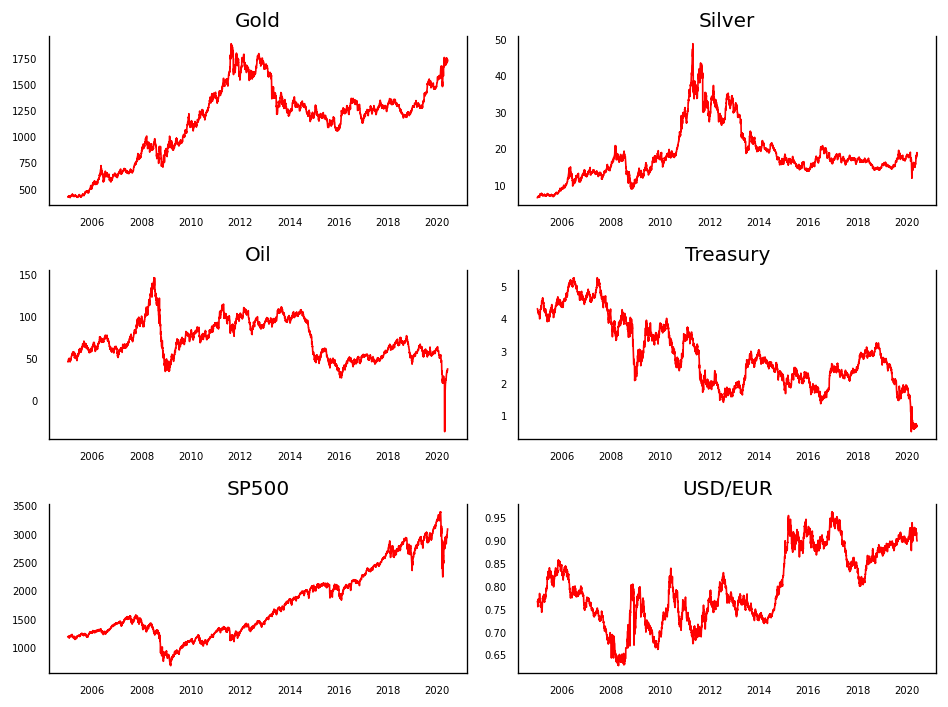

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(8,6))
for i, ax in enumerate(axes.flatten()):
 data = df_comp[df_comp.columns[i]]
 ax.plot(data, color='red', linewidth=1)
 ax.set_title(df_comp.columns[i])
 ax.xaxis.set_ticks_position('none')
 ax.yaxis.set_ticks_position('none')
 ax.spines['top'].set_alpha(0)
 ax.tick_params(labelsize=6)
 plt.tight_layout();

In [14]:
corr=df_comp.corr()
corr

,Gold,Silver,Oil,Treasury,SP500,USD/EUR
Gold,1.000000,0.790730,0.200925,-0.842101,0.393351,0.165017
Silver,0.790730,1.000000,0.541254,-0.455373,-0.097715,-0.269687
Oil,0.200925,0.541254,1.000000,0.168493,-0.386262,-0.751603
Treasury,-0.842101,-0.455373,0.168493,1.000000,-0.502857,-0.464865
SP500,0.393351,-0.097715,-0.386262,-0.502857,1.000000,0.704467
USD/EUR,0.165017,-0.269687,-0.751603,-0.464865,0.704467,1.000000


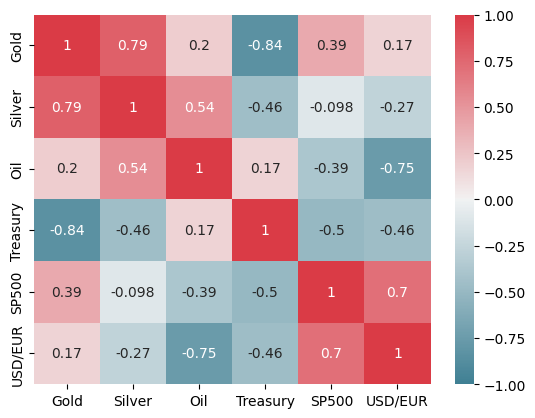

In [18]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True,vmax=1, vmin=-1, cmap =sns.diverging_palette(220, 10, as_cmap=True),center=0 )
plt.show()

# Dividir los datos en conjunto de Entrenamiento y Prueba
El modelo VAR se ajustará al conjunto de entrenamiento X_train y luego se utilizará el modelo para pronosticar las próximas 15 observaciones. Estos pronósticos se compararán con los datos reales del conjunto de prueba.

In [19]:
n_obs=15
X_train, X_test = df_comp[0:-n_obs], df_comp[-n_obs:]
print(X_train.shape, X_test.shape)

(4003, 6) (15, 6)


# Prueba de estacionariedad
Necesitamos que los datos sean estacionarios para poder usar el modelo VAR. Vamos a averiguarlo haciendo un Test de Dickey-Fuller aumentado, a cada variable univariante que tiene nuestro dataset.

In [21]:
def augmented_dickey_fuller_statistics(time_series):
  result = sts.adfuller(time_series.values)
  print('p-value: %f' % result[1])

print('Test de Dickey-Fuller Aumentado:')
print('Serie de tiempo Precio del Oro')
augmented_dickey_fuller_statistics(X_train['Gold'])
print('Serie de tiempo Precio de la Plata')
augmented_dickey_fuller_statistics(X_train['Silver'])
print('Serie de tiempo Precio del Petróleo')
augmented_dickey_fuller_statistics(X_train['Oil'])
print('Serie de tiempo Índice del rendimiento de bonos del tesoro en 10 años')
augmented_dickey_fuller_statistics(X_train['Treasury'])
print('Serie de tiempo Índice SP500')
augmented_dickey_fuller_statistics(X_train['SP500'])
print('Serie de tiempo Cambio USD/EUR')
augmented_dickey_fuller_statistics(X_train['USD/EUR'])

Test de Dickey-Fuller Aumentado:
Serie de tiempo Precio del Oro
p-value: 0.512554
Serie de tiempo Precio de la Plata
p-value: 0.300779
Serie de tiempo Precio del Petróleo
p-value: 0.106259
Serie de tiempo Índice del rendimiento de bonos del tesoro en 10 años
p-value: 0.668441
Serie de tiempo Índice SP500
p-value: 0.941980
Serie de tiempo Cambio USD/EUR
p-value: 0.574155


Todos los p-valores son mayores que 0.05, con lo cual no se rechaza la hipótesis nula de que la serie no es estacionaria. Habría que transformar los datos porque no se puede confirmar estacionariedad.

# Transformación de los datos
La aplicación de la primera diferenciación en el conjunto de entrenamiento debería hacer que todas las series 6 sean estacionarias. Sin embargo, este es un proceso iterativo en el que, después de la primera diferenciación, es posible que la serie siga siendo no estacionaria. Tendremos que aplicar una segunda diferencia o transformación logarítmica para estandarizar la serie en tales casos.

In [22]:
X_train_transformed=X_train.diff().dropna()
X_train_transformed.head()

,Gold,Silver,Oil,Treasury,SP500,USD/EUR
Date,,,,,,
2005-01-10,0.200012,0.002,-0.099998,-0.007,4.060059,-0.00286
2005-01-11,2.799988,0.192,0.349998,-0.034,-7.260010,-0.00041
2005-01-12,4.200012,0.105,0.689999,-0.008,4.709961,-0.00799
2005-01-13,-1.600006,0.002,1.670002,-0.049,-10.250000,0.00256
2005-01-14,-1.799988,-0.150,0.340000,0.029,7.070068,0.00648


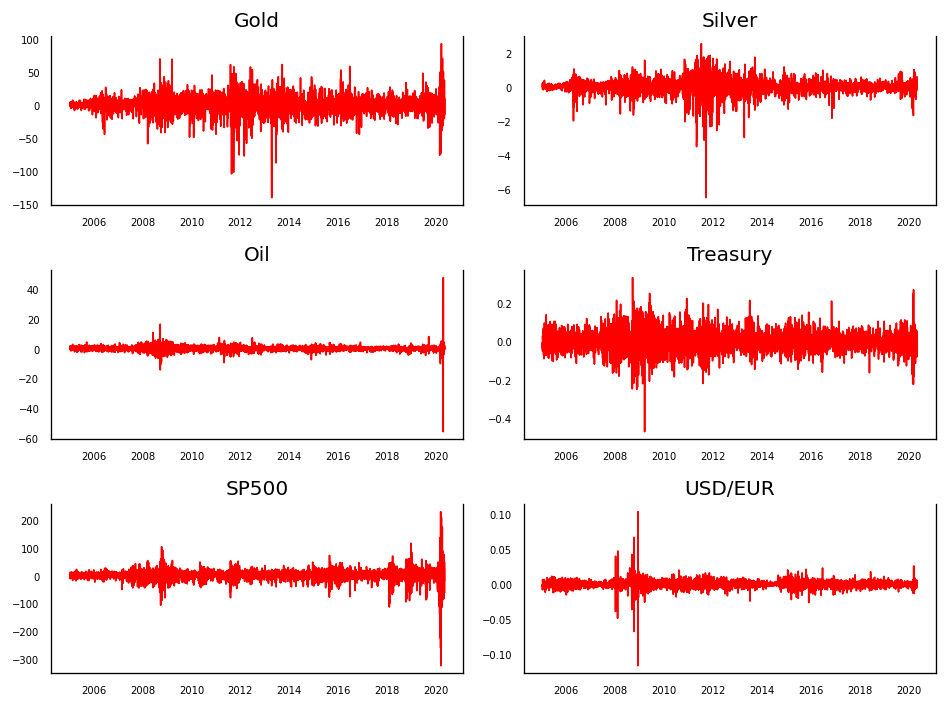

In [23]:
# Dibujemos los datos transformados
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(8,6))
for i, ax in enumerate(axes.flatten()):
  d = X_train_transformed[X_train_transformed.columns[i]]
  ax.plot(d, color='red', linewidth=1)
  ax.set_title(df_comp.columns[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines['top'].set_alpha(0)
  ax.tick_params(labelsize=6)
  plt.tight_layout();

Chequeando si los datos transformados (diferenciados) son estacionarios:

In [24]:
print('Test de Dickey-Fuller Aumentado:')
print('Serie de tiempo Precio del Oro Diferenciada')
augmented_dickey_fuller_statistics(X_train_transformed['Gold'])
print('Serie de tiempo Precio de la Plata Diferenciada')
augmented_dickey_fuller_statistics(X_train_transformed['Silver'])
print('Serie de tiempo Precio del Petróleo Diferenciada')
augmented_dickey_fuller_statistics(X_train_transformed['Oil'])
print('Serie de tiempo Índice del rendimiento de bonos del tesoro en 10 años Diferenciada')
augmented_dickey_fuller_statistics(X_train_transformed['Treasury'])
print('Serie de tiempo Índice SP500 Diferenciada')
augmented_dickey_fuller_statistics(X_train_transformed['SP500'])
print('Serie de tiempo Cambio USD/EUR Diferenciada')
augmented_dickey_fuller_statistics(X_train_transformed['USD/EUR'])

Test de Dickey-Fuller Aumentado:
Serie de tiempo Precio del Oro Diferenciada
p-value: 0.000000
Serie de tiempo Precio de la Plata Diferenciada
p-value: 0.000000
Serie de tiempo Precio del Petróleo Diferenciada
p-value: 0.000000
Serie de tiempo Índice del rendimiento de bonos del tesoro en 10 años Diferenciada
p-value: 0.000000
Serie de tiempo Índice SP500 Diferenciada
p-value: 0.000000
Serie de tiempo Cambio USD/EUR Diferenciada
p-value: 0.000000


Todos los p-valores son < 0.05 por lo tanto se podría concluir que con un solo orden de diferenciación se obtienen series estacionarias.

# Modelo VAR
VAR requiere la estacionariedad de la serie, lo que significa que la media de la serie no cambia con el tiempo (podemos verlo en el gráfico dibujado junto a la Prueba de Dickey-Fuller aumentada).

In [26]:
model = VAR(X_train_transformed)

## Seleccionando el orden del modelo

In [27]:
modelsel=model.select_order(15)
modelsel.summary()

,AIC,BIC,FPE,HQIC
0,-6.424,-6.414,0.001623,-6.420
1,-6.593,-6.527*,0.001369,-6.570
2,-6.618,-6.495,0.001336,-6.574*
3,-6.616,-6.436,0.001338,-6.553
4,-6.617,-6.380,0.001338,-6.533
5,-6.612,-6.319,0.001344,-6.508
6,-6.629,-6.279,0.001321,-6.505
7,-6.658,-6.251,0.001283,-6.514
8,-6.664,-6.200,0.001276,-6.499
9,-6.676,-6.155,0.001261,-6.491


## Ajustando el modelo

In [28]:
res = model.fit(maxlags=15, ic='aic')
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 02, Sep, 2023
Time:                     12:49:32
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -5.83084
Nobs:                     3987.00    HQIC:                  -6.38690
Log likelihood:          -20056.7    FPE:                 0.00124045
AIC:                     -6.69233    Det(Omega_mle):      0.00108336
--------------------------------------------------------------------
Results for equation Gold
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.278853         0.210980            1.322           0.186
L1.Gold             -0.049310         0.025521           -1.932           0.053
L1.Silver            0.730226         0.792336            0.922  

## Causalidad de Granger

Si el p-valor < 0.05 Rechazo la hipótesis nula H0 y mantengo la variable dentro del modelo.

### Gold

In [29]:
grangercaus=res.test_causality(['Silver', 'Oil', 'Treasury','SP500','USD/EUR'],['Gold'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
3.542,1.284,0.000,"(75, 23376)"


### Silver

In [30]:
grangercaus=res.test_causality(['Gold', 'Oil', 'Treasury','SP500','USD/EUR'],['Silver'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
1.822,1.284,0.000,"(75, 23376)"


### Oil

In [32]:
grangercaus=res.test_causality(['Gold', 'Silver', 'Treasury','SP500','USD/EUR'],['Oil'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
2.198,1.284,0.000,"(75, 23376)"


### Treasury

In [33]:
grangercaus=res.test_causality(['Gold', 'Silver', 'Oil','SP500','USD/EUR'],['Treasury'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
2.271,1.284,0.000,"(75, 23376)"


### SP500

In [34]:
grangercaus=res.test_causality(['Gold', 'Silver', 'Oil','Treasury','USD/EUR'],['SP500'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
3.641,1.284,0.000,"(75, 23376)"


### USD/EUR

In [35]:
grangercaus=res.test_causality(['Gold', 'Silver', 'Oil','Treasury','SP500'],['USD/EUR'],kind='f')
grangercaus.summary()

Test statistic,Critical value,p-value,df
1.784,1.284,0.000,"(75, 23376)"


# Matriz de causalidad de Granger

In [37]:
maxlag=15
test = 'ssr_chi2test'
def grangers_causality_matrix(X_train_transformed, variables, test = 'ssr_chi2test', verbose=False):
  dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
  for c in dataset.columns:
    for r in dataset.index:
      test_result = grangercausalitytests(X_train_transformed[[r,c]], maxlag=maxlag, verbose=False)
      p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
      if verbose: 
        print(f'Y = {r}, X = {c}, P Values = {p_values}')
      min_p_value = np.min(p_values)
      dataset.loc[r,c] = min_p_value
  dataset.columns = [var + '_x' for var in variables]
  dataset.index = [var + '_y' for var in variables]
  return dataset
grangers_causality_matrix(X_train_transformed, variables = X_train_transformed.columns)

C:\Users\Luciano\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Luciano\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Luciano\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Luciano\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Luciano\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\Luciano\AppData\Roami

,Gold_x,Silver_x,Oil_x,Treasury_x,SP500_x,USD/EUR_x
Gold_y,1.0000,0.0025,0.0000,0.0000,0.0000,0.0805
Silver_y,0.0000,1.0000,0.0001,0.0052,0.0000,0.0278
Oil_y,0.0000,0.0000,1.0000,0.0008,0.0000,0.0003
Treasury_y,0.0003,0.0221,0.0202,1.0000,0.0014,0.0045
SP500_y,0.0000,0.1395,0.0000,0.0131,1.0000,0.0147
USD/EUR_y,0.0000,0.0000,0.0000,0.0014,0.0003,1.0000


# Diagnosis del modelo

### Residuos

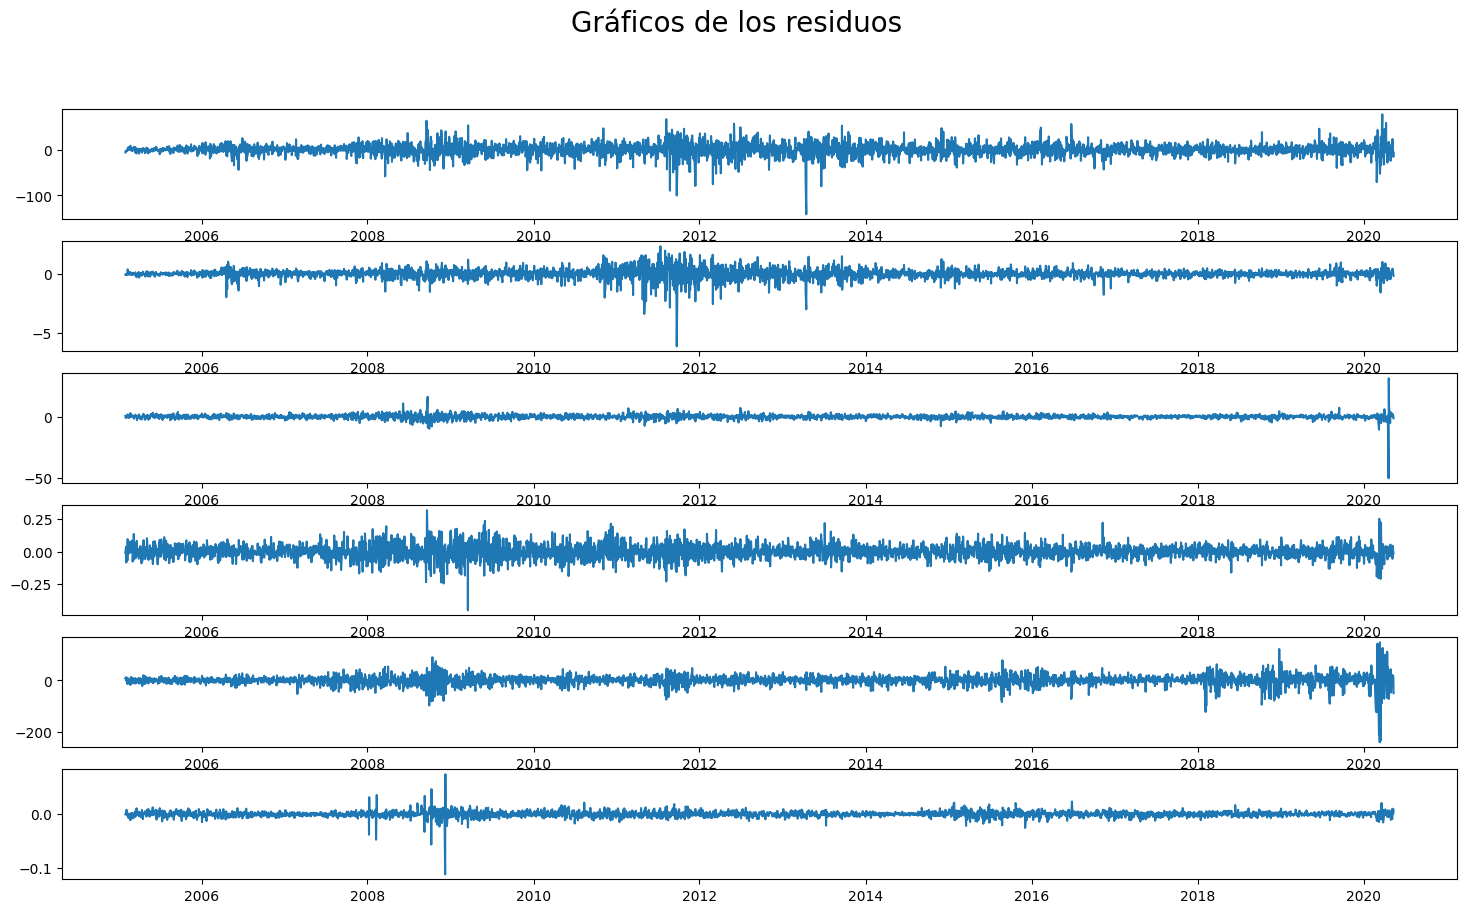

In [38]:
residuals=res.resid

fig, axs = plt.subplots(6)
fig.suptitle('Gráficos de los residuos',fontsize=20)
fig.set_size_inches(18, 10)
[axs[i].plot(residuals.iloc[:,i]) for i in range(6)]
plt.show()

## Dickey - Fuller a los residuos

In [39]:
print('Gold Silver Oil Treas. SP500 USD/EUR')
[sts.adfuller(residuals.iloc[:,i])[1] for i in range(6)]


Gold Silver Oil Treas. SP500 USD/EUR


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Todos los p-valores son < 0.05 por tanto se rechaza la hipótesis nula de que las 6 series de residuos no son estacionarias, por lo cual con un 95% de confianza se cree que son estacionarias. 

## AFC de residuos

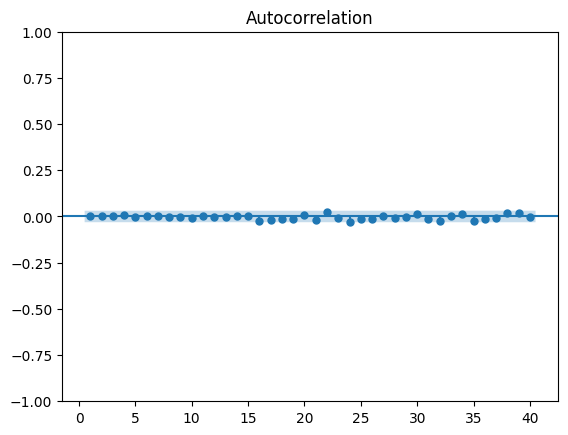

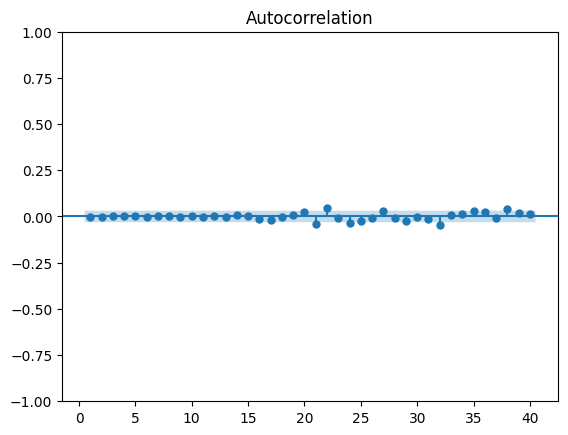

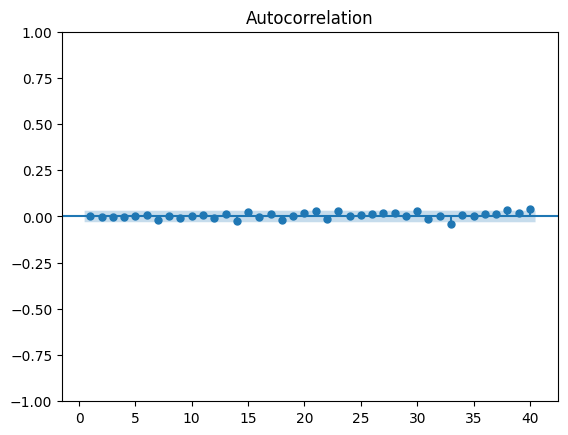

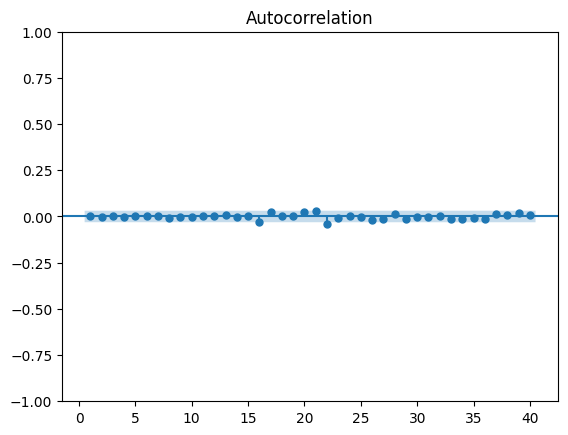

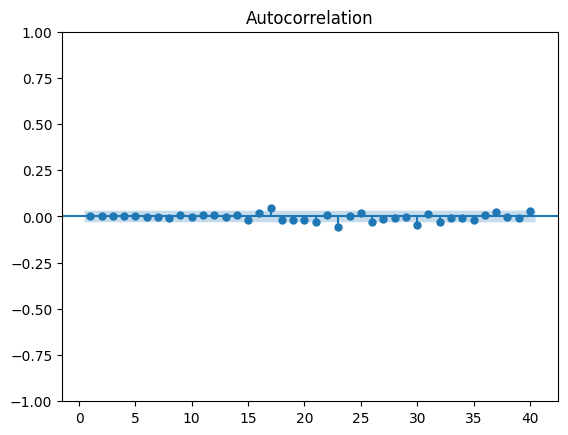

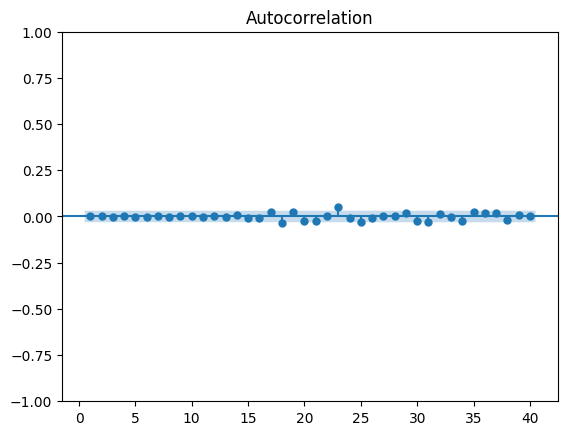

In [41]:
[sgt.plot_acf(residuals.iloc[:,i], zero = False, lags = 40) for i in range(6)]
plt.show()

Conclusión: Los residuos del modelo no presentan estructura de autocorrelación, son estacionarios según los resultados de la prueba de Dickey - Fuller aumentada y en los gráficos se puede comprobar esto visualmente, entonces puede concluirse que son ruido blanco como es deseable.

## Valores predichos

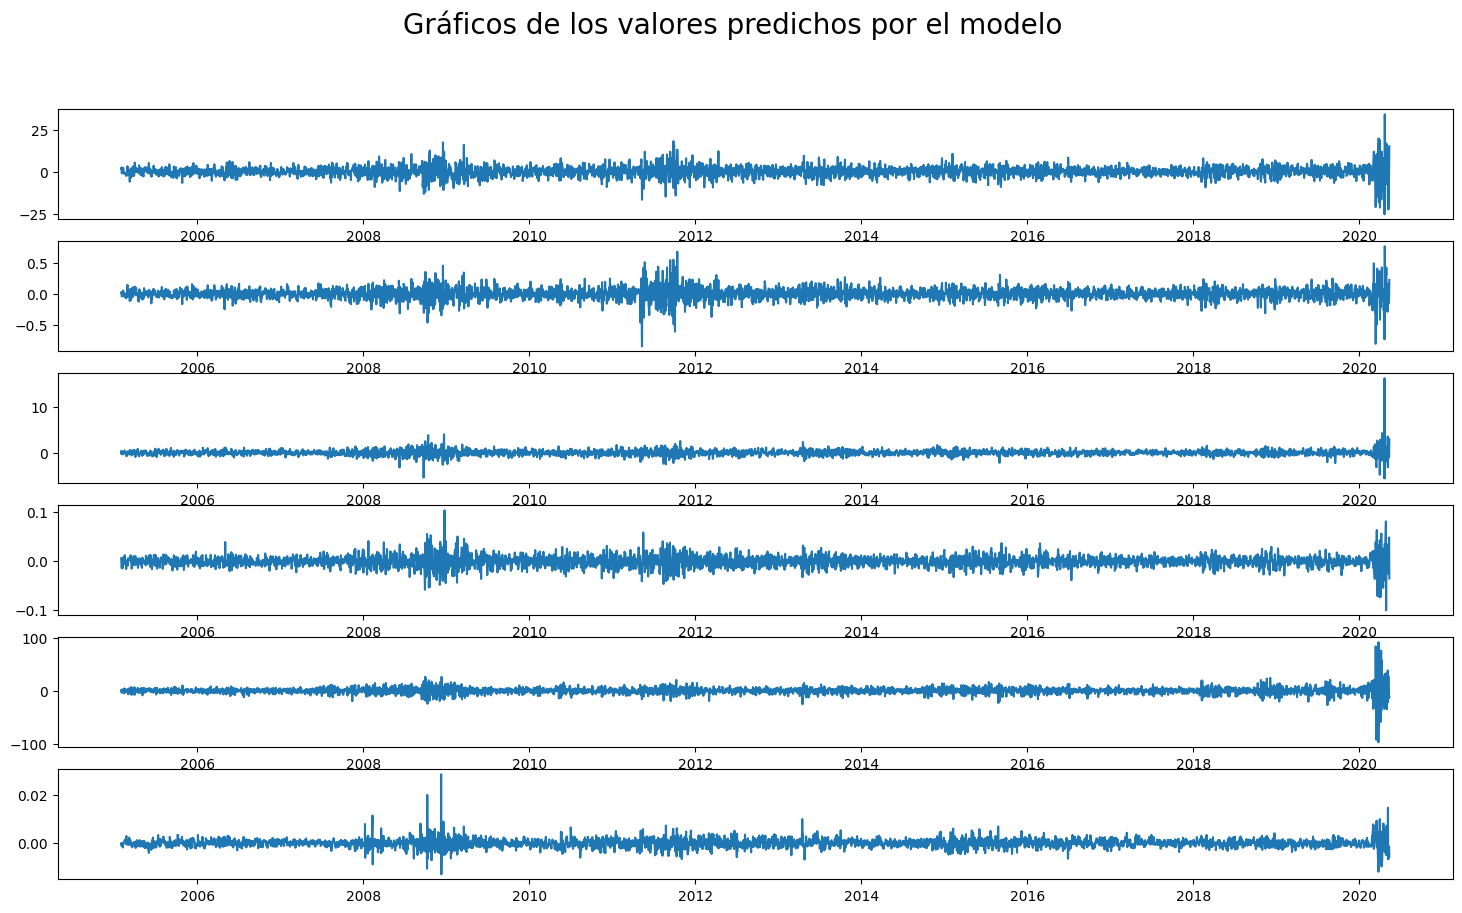

In [42]:
y_fitted = res.fittedvalues
fig, axs = plt.subplots(6)
fig.suptitle('Gráficos de los valores predichos por el modelo',fontsize=20)
fig.set_size_inches(18, 10)
[axs[i].plot(y_fitted.iloc[:,i]) for i in range(6)]
plt.show()

# Pronósticos a futuro

## Hallando los pronósticos

Para pronosticar, al modelo VAR le podemos pasar hasta el número de orden de retraso de observaciones de los datos pasados. Esto se debe a que los términos en el modelo VAR son esencialmente los retrasos de las diversas series de tiempo en el conjunto de datos, por lo que debemos proporcionar tantos valores anteriores como lo indique el orden de retraso utilizado por el modelo. De lo contrario estaríamos introduciendo poca fiabilidad.


In [43]:
# Obtener el orden del modelo
lag_order = res.k_ar
print('Orden del modelo:', lag_order)
# Input data para hacer forecasting (pronósticos a futuro)
input_data = X_train_transformed.values[-lag_order:]
# Forecasting
pred = res.forecast(y=input_data, steps=n_obs)
pred = (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred'))
print('Predicciones:')
pred

Orden del modelo: 15
Predicciones:


,Gold_pred,Silver_pred,Oil_pred,Treasury_pred,SP500_pred,USD/EUR_pred
Date,,,,,,
2020-05-13,-0.883182,-0.205427,-1.679844,0.006338,7.476672,0.000201
2020-05-14,4.281807,0.155234,0.932879,-0.024220,-5.535150,0.000040
2020-05-15,2.692525,0.163755,0.046323,-0.011639,-3.295614,-0.000101
2020-05-18,-8.921980,-0.168946,-0.288993,0.026190,-2.644007,0.000418
2020-05-19,-2.413338,-0.014360,-0.146763,-0.000098,4.823713,-0.002100
2020-05-20,4.553831,0.172845,-0.462273,-0.002059,7.152156,0.000763
2020-05-21,-1.388742,-0.153833,-0.245914,0.003261,-14.780017,-0.000373
2020-05-22,0.052518,-0.106465,1.301405,0.010817,10.216138,-0.002215
2020-05-25,4.547111,0.130198,-0.797513,-0.008032,-5.561355,-0.000216


<Figure size 1200x1000 with 0 Axes>

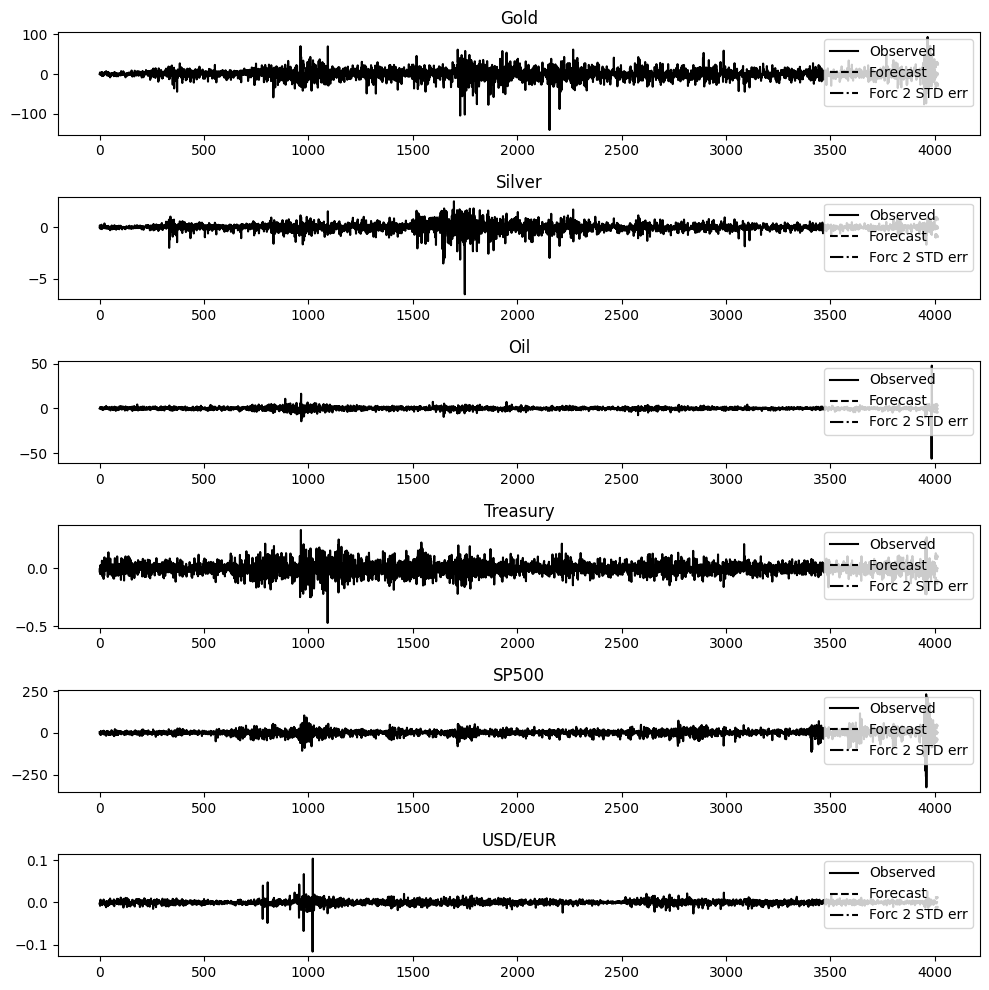

In [44]:
plt.figure(figsize = (12, 10))
res.plot_forecast(15)
plt.tight_layout(h_pad = 1.15)
plt.show()

## Invirtiendo la transformación de los pronósticos a la escala original

Los pronósticos se generan en la escala de los datos de entrenamiento utilizados por el modelo, es decir, son datos transformados. Entonces, para volver a ponerlos en su escala original, necesitamos des-diferenciarlos.
La forma de invertir la diferenciación es sumar estas diferencias consecutivamente al número base. Una forma sencilla de hacerlo es determinar primero la suma acumulada y luego sumarla al número base.
Este proceso se puede revertir agregando la observación en el paso de tiempo anterior al difference value. inverted(ts) = differenced(ts) + observation(ts-1)

In [46]:
# Invirtiendo la transformación
def invert_transformation(X_train, pred):
  forecast = pred.copy()
  columns = X_train.columns
  for col in columns:
    forecast[str(col)+'_pred'] = X_train[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
  return forecast

output = invert_transformation(X_train, pred)
output



,Gold_pred,Silver_pred,Oil_pred,Treasury_pred,SP500_pred,USD/EUR_pred
Date,,,,,,
2020-05-13,1703.516843,15.481574,24.100157,0.684338,2877.596790,0.925321
2020-05-14,1707.798649,15.636808,25.033036,0.660118,2872.061639,0.925361
2020-05-15,1710.491174,15.800563,25.079359,0.648479,2868.766025,0.925259
2020-05-18,1701.569194,15.631617,24.790366,0.674669,2866.122018,0.925678
2020-05-19,1699.155856,15.617258,24.643603,0.674571,2870.945731,0.923578
2020-05-20,1703.709686,15.790103,24.181331,0.672513,2878.097887,0.924341
2020-05-21,1702.320944,15.636271,23.935417,0.675773,2863.317869,0.923968
2020-05-22,1702.373462,15.529805,25.236821,0.686591,2873.534007,0.921753
2020-05-25,1706.920573,15.660004,24.439309,0.678558,2867.972652,0.921537


## Pronósticos del Oro

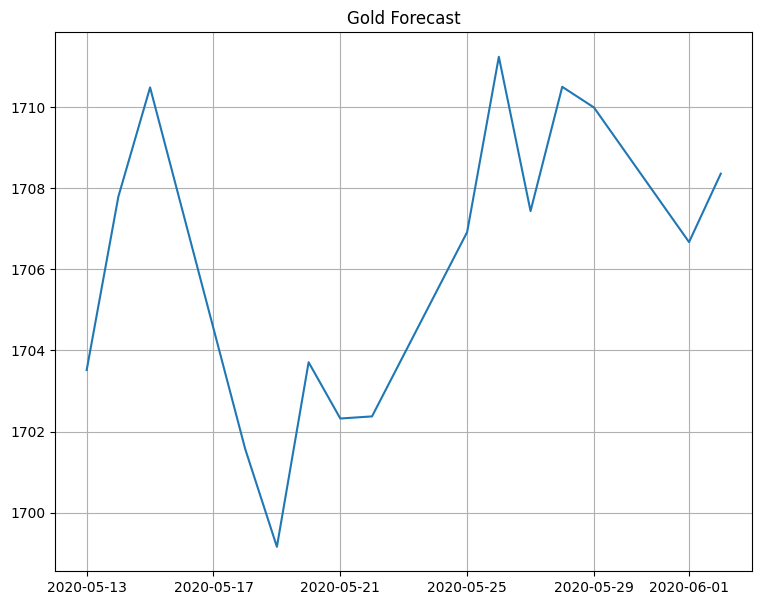

In [47]:
plt.figure(figsize = (9,7))
plt.plot(output.iloc[:,0])
plt.title('Gold Forecast')
plt.grid()
plt.show()

## Comparando los datos pronosticados con el dataset de prueba

In [48]:
combine = pd.concat([output['Gold_pred'], X_test['Gold']], axis=1)
combine = combine.round(decimals=2)
combine = combine.reset_index()
combine = combine.sort_values(by='Date', ascending=False)

In [49]:
combine

,Date,Gold_pred,Gold
14,2020-06-02,1708.36,1725.2
13,2020-06-01,1706.67,1737.8
12,2020-05-29,1710.00,1736.9
11,2020-05-28,1710.51,1713.3
10,2020-05-27,1707.44,1710.3
9,2020-05-26,1711.25,1704.8
8,2020-05-25,1706.92,1734.6
7,2020-05-22,1702.37,1734.6
6,2020-05-21,1702.32,1720.5
5,2020-05-20,1703.71,1750.6


# Evaluación del modelo

Para evaluar los pronósticos, se puede calcular un conjunto completo de métricas, como MAE y RMSE. 

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean absolute error:', mean_absolute_error(combine['Gold'].values, combine['Gold_pred'].values))
print('Root mean squared error:', np.sqrt(mean_squared_error(combine['Gold'].values, combine['Gold_pred'].values)))

Mean absolute error: 24.720666666666663
Root mean squared error: 28.49273065186977
